In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
cd ../scripts/

/Users/kadofong/work/projects/merian/skipper/scripts


In [67]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from skipper import observe
from ekfplot import plot as ek

import our_pointings

In [10]:
spring_ha, spring_oiii = our_pointings.load_springfields ()

In [11]:
coo_ha = observe.CopilotOutput ( '/Users/kadofong/Downloads/db_merian.fits', spring_ha )

In [12]:
coo_oiii = observe.CopilotOutput ( '/Users/kadofong/Downloads/db_merian.fits', spring_oiii )

In [65]:
plt.rcParams['font.size'] = 15

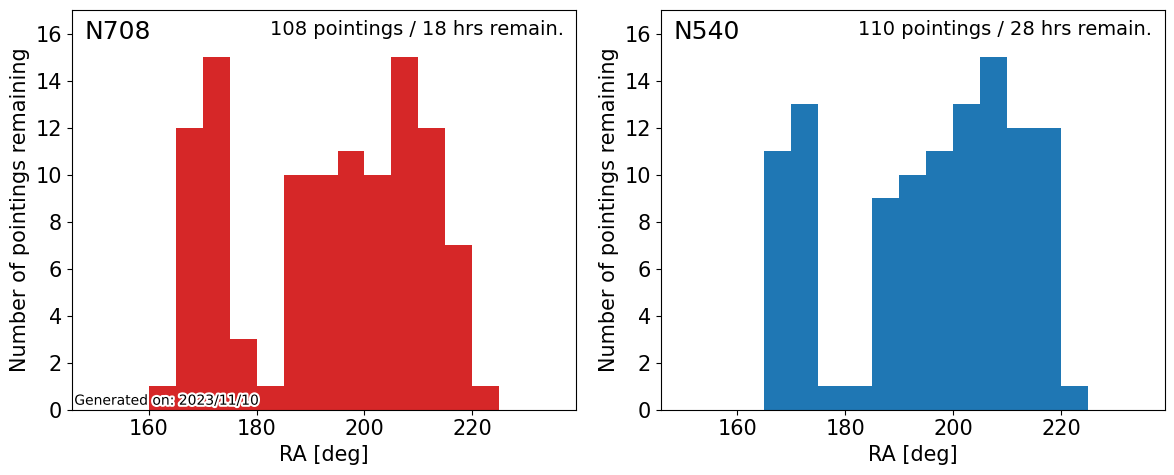

In [71]:
exptime_d = {'N708':600.,'N540':900.}
pointings_d = {'N708':spring_ha, 'N540':spring_oiii}
coo_d = {"N708":coo_ha, "N540":coo_oiii}
colors = {'N708':'tab:red', 'N540':'tab:blue'}

fig, axarr = plt.subplots(1,2,figsize=(12,5))
for idx,key in enumerate(['N708','N540']):
    coo = coo_d[key]
    pointings = pointings_d[key]
    exptime = exptime_d[key]
    
    unobserved = ~np.in1d(pointings.object, coo.merian_sidecar['object'])
    remaining_hours = (unobserved.sum()*exptime)/3600.
    
    ax = axarr[idx]
    ax.hist ( pointings.loc[unobserved, 'RA'], bins=np.arange(150,240,5),color=colors[key] )  
    ek.text ( 0.025, 0.975, key, fontsize=18, ax=ax )
    ek.text ( 0.975, 0.975, f'{unobserved.sum()} pointings / {unobserved.sum()*exptime/3600.:.0f} hrs remain.', 
              ax=ax, fontsize=14 )
    
    ax.set_xlabel('RA [deg]')
    ax.set_ylabel(r'Number of pointings remaining')
    ax.set_ylim(0,17)

current_date = datetime.now().strftime("%Y/%m/%d")
ek.text ( 0.005, 0.005, f'Generated on: {current_date}', ax=axarr[0], fontsize=10, bordercolor='w', borderwidth=3 )
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/remaining_pointings_spring.png')

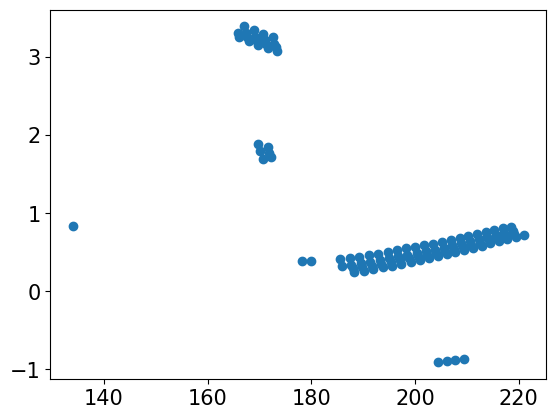

In [78]:
plt.scatter ( 
    pointings.loc[unobserved,'RA'],
    pointings.loc[unobserved,'dec'],
)

In [ ]:
date

In [73]:
(18+28)/8

5.75

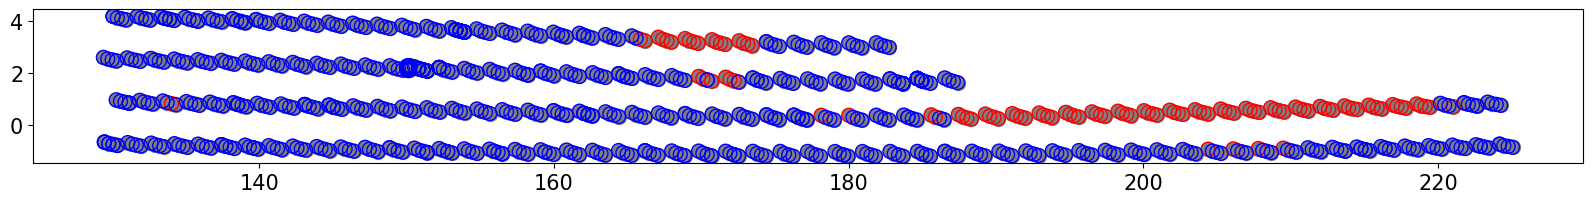

In [80]:
fig = plt.figure(figsize=(20,2))
ck = {'s':100}
plt.scatter ( pointings['RA'], pointings['dec'], color='grey', **ck )
plt.scatter ( pointings.loc[unobserved,'RA'], pointings.loc[unobserved,'dec'], edgecolor='r', facecolor='None', **ck )
plt.scatter ( coo.merian_sidecar['rabore'], coo.merian_sidecar['decbore'], edgecolor='b', facecolor='None', **ck )

(array([ 0.,  0.,  1., 12., 15.,  3.,  1., 10., 10., 11., 10., 15., 12.,
         7.,  1.,  0.,  0.,  0.,  0.]),
 array([150., 155., 160., 165., 170., 175., 180., 185., 190., 195., 200.,
        205., 210., 215., 220., 225., 230., 235., 240., 245.]),
 <BarContainer object of 19 artists>)

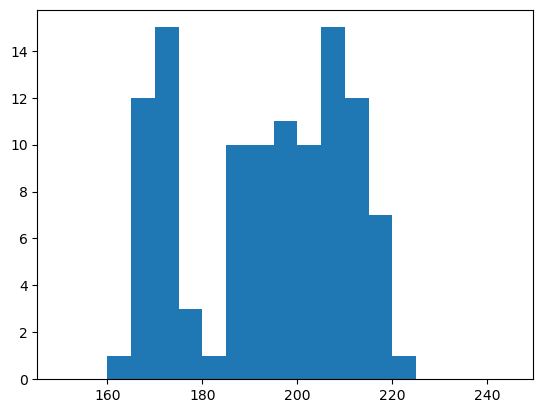

In [49]:
plt.hist ( spring_ha.loc[unobserved, 'RA'], bins=np.arange(150,250,5) ) 